In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
dataset.isnull

<bound method DataFrame.isnull of        count  hate_speech_count  offensive_language_count  neither_count  \
0          3                  0                         0              3   
1          3                  0                         3              0   
2          3                  0                         3              0   
3          3                  0                         2              1   
4          6                  0                         6              0   
...      ...                ...                       ...            ...   
24778      3                  0                         2              1   
24779      3                  0                         1              2   
24780      3                  0                         3              0   
24781      6                  0                         6              0   
24782      3                  0                         0              3   

       class                                         

In [7]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
dataset["labels"] = dataset["class"].map({0:"Hate Speech",1:"Offensive Language",2:"Neither Hate nor Offensive Language"})

In [9]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate nor Offensive Language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither Hate nor Offensive Language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [10]:
data = dataset[["tweet","labels"]]

In [11]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate nor Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neither Hate nor Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [12]:
#starting machine learning
#to get rid of expressions
#importing regular expression and natural language toolkit
import re
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#importing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'theirs', 'were', 'y', "haven't", 'at', "isn't", 'until', 'against', "they'll", 'why', "i'm", 'above', 'mustn', "it's", 'herself', 'does', 'will', 'but', 'about', 'and', 'hadn', 'being', 'did', "we've", "weren't", "they'd", 'mightn', 'he', 'now', 'been', 'then', 'them', 'there', 'wouldn', "you've", 'do', 'from', 'i', 'in', 'how', 'so', 'both', 'by', 'aren', 'themselves', 'ourselves', "doesn't", 'under', 'not', 'won', 'when', 'the', 'shouldn', 'most', 'myself', 'only', 'such', 've', 'further', "won't", 'is', 'our', "he'll", 'all', 'down', 'to', 'with', 'on', 'no', "it'll", "that'll", 'out', 'doesn', "we're", "he'd", "it'd", 'having', 'too', "you'll", "i'll", 'him', "shouldn't", 'a', 'couldn', 'of', 'should', "hadn't", 'needn', "mightn't", 'for', 'her', 'hers', "i'd", 'through', 'who', 'these', 'we', 'have', "needn't", 'am', 'each', 'which', 'after', "couldn't", 'doing', 'itself', 'or', 'that', 'didn', "we'll", 'just', 'whom', 'here', 'over', 'me', "she'll", 'once', "she's", "he's", 'we

In [14]:
stop_words.add("rt")

In [15]:
%config IPCompleter.greedy=True

In [16]:
#import stemming 
stemmer = nltk.SnowballStemmer("english")

In [17]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate nor Offensive Language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither Hate nor Offensive Language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [18]:
#data cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.S+', '', text)
    text = re.sub(r"\[.*?\]", '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text).strip()
    text = re.sub(r'\w*\d\w*', '', text)
     # Tokenize, remove stopwords, and apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join words back into a single string
    return " ".join(words)
    

In [19]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\swaya\AppData\Local\Temp\ipykernel_23468\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [20]:
data

,tweet,labels
0,mayasolov woman shouldnt complain clean hous a...,Neither Hate nor Offensive Language
1,boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,urkindofbrand dawg ever fuck bitch start cri c...,Offensive Language
3,cganderson vivabas look like tranni,Offensive Language
4,shenikarobert shit hear might true might faker...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,Neither Hate nor Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [21]:
 #creating into numpy array
X = np.array(data["tweet"])
y = np.array(data["labels"])

In [22]:
X

array(['mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'boy dat coldtyga dwn bad cuffin dat hoe place',
       'urkindofbrand dawg ever fuck bitch start cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [23]:
#convert into vector form
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [25]:
X

<24783x25301 sparse matrix of type '<class 'numpy.int64'>'
	with 191122 stored elements in Compressed Sparse Row format>

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X

<24783x25301 sparse matrix of type '<class 'numpy.int64'>'
	with 191122 stored elements in Compressed Sparse Row format>

In [28]:
#builing the ML model
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)

In [31]:
#confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 193,   27,  245],
       [  82, 1090,  207],
       [ 299,  193, 5843]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

                                     precision    recall  f1-score   support

                        Hate Speech       0.34      0.42      0.37       465
Neither Hate nor Offensive Language       0.83      0.79      0.81      1379
                 Offensive Language       0.93      0.92      0.93      6335

                           accuracy                           0.87      8179
                          macro avg       0.70      0.71      0.70      8179
                       weighted avg       0.88      0.87      0.87      8179



In [34]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

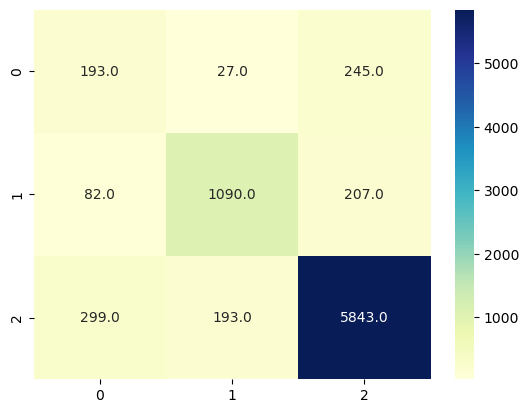

In [35]:
#plotting the graph
sns.heatmap(cm,annot = True,fmt=".1f",cmap="YlGnBu")
ply.show()

In [36]:
#to display the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8712556547255166

In [37]:
sample = " kill all the people in the city "
sample = clean_data(sample)

In [38]:
sample

'kill peopl citi'

In [39]:
data = cv.transform([sample]).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
dt.predict(data)

array(['Hate Speech'], dtype=object)

In [ ]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(dt,file)